In [ ]:
set.seed(2000)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [2]:
url <- "https://raw.githubusercontent.com/eknoll02/dsci-100-003-group-3/main/abalone.csv"

c <- c("sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings")

abalone <- read_csv(url, col_names = c) 
abalone

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (8): length, diameter, height, whole_weight, shucked_weight, viscera_wei...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    M   0.350  0.265    0.090  0.2255       0.0995         0.0485        
3    F   0.530  0.420    0.135  0.6770       0.2565         0.1415        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
4175 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
4176 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
4177 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.15         15   
2    0.07          7   
3    0.21          9   
⋮    ⋮            ⋮    
4175 0.308         9   
4176 0.296        10   
4177 0.495        12

In [3]:
abalone <- abalone |>
mutate(sex = as_factor(sex))

abalone

sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    M   0.350  0.265    0.090  0.2255       0.0995         0.0485        
3    F   0.530  0.420    0.135  0.6770       0.2565         0.1415        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
4175 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
4176 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
4177 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.15         15   
2    0.07          7   
3    0.21          9   
⋮    ⋮            ⋮    
4175 0.308         9   
4176 0.296        10   
4177 0.495        12

In [4]:
abalone_split <- initial_split(abalone, prop = 0.75, strata = shucked_weight)
abalone_testing <- testing(abalone_split)
abalone_training <- training(abalone_split)

abalone_testing
abalone_training

sex length diameter height whole_weight shucked_weight viscera_weight
1    I   0.425  0.300    0.095  0.3515       0.141          0.0775        
2    F   0.530  0.415    0.150  0.7775       0.237          0.1415        
3    F   0.545  0.425    0.125  0.7680       0.294          0.1495        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
1044 M   0.590  0.440    0.135  0.9660       0.4390         0.2145        
1045 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
1046 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
     shell_weight rings
1    0.12          8   
2    0.33         20   
3    0.26         16   
⋮    ⋮            ⋮    
1044 0.2605       10   
1045 0.3080        9   
1046 0.2960       10

sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.35   0.265    0.09   0.2255       0.0995         0.0485        
2    I   0.33   0.255    0.08   0.2050       0.0895         0.0395        
3    M   0.43   0.350    0.11   0.4060       0.1675         0.0810        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
3129 M   0.695  0.550    0.195  1.6645       0.7270         0.3600        
3130 M   0.770  0.605    0.175  2.0505       0.8005         0.5260        
3131 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.070         7   
2    0.055         7   
3    0.135        10   
⋮    ⋮            ⋮    
3129 0.445        11   
3130 0.355        11   
3131 0.495        12

In [5]:
abalone_sex <- abalone_training |>
group_by(sex) |>
summarize(count = n())

abalone_mean <- abalone_training |>
select(-sex, - shucked_weight) |>
map_dfr(mean)

abalone_sex
abalone_mean
     

sex count
1 M   1142 
2 F    953 
3 I   1036

length    diameter  height    whole_weight viscera_weight shell_weight
1 0.5233983 0.4075088 0.1393485 0.8264069    0.1797264      0.2380618   
  rings   
1 9.924305

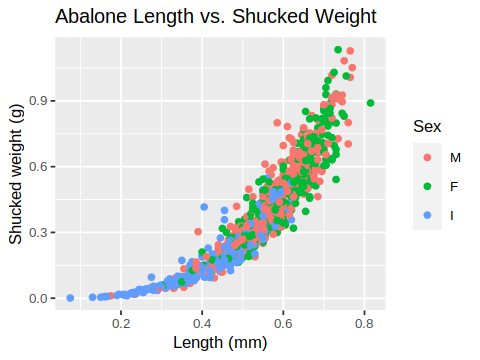

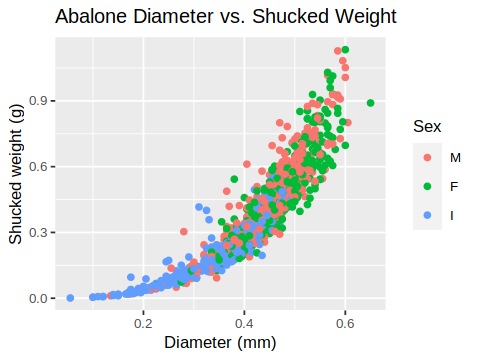

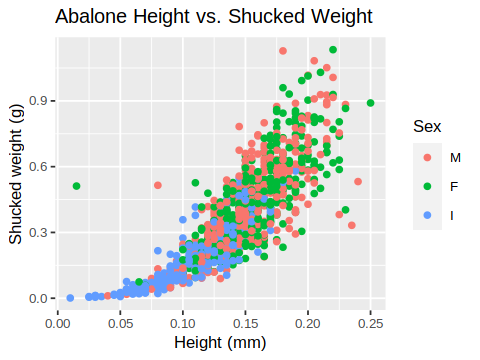

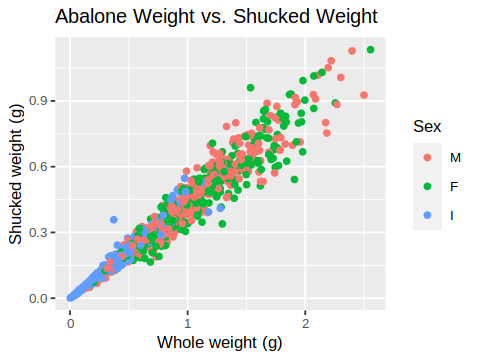

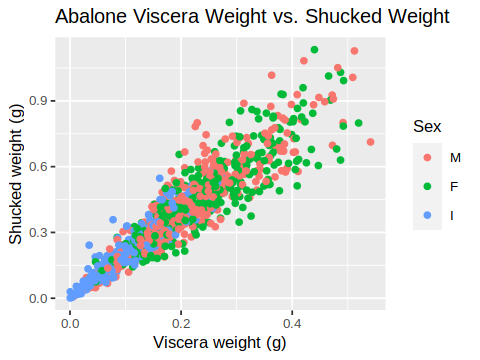

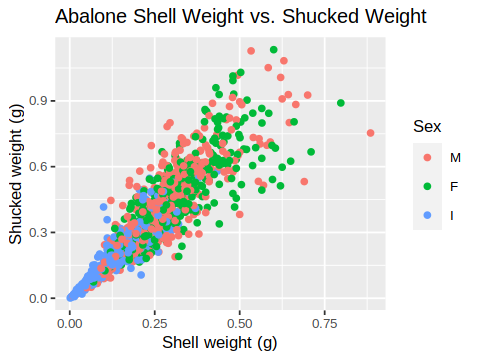

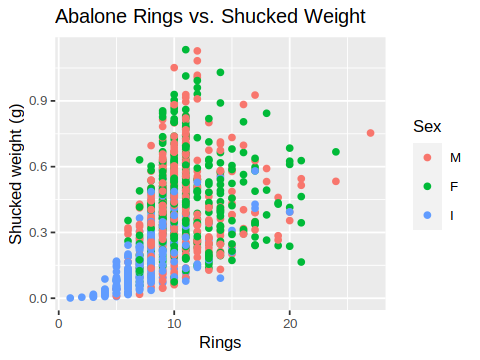

In [6]:
options(repr.plot.width = 4, repr.plot.height = 3)

abalone_length_plot <- abalone_testing |>
ggplot(aes(x = length, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Length (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Length vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_diameter_plot <- abalone_testing |>
ggplot(aes(x = diameter, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Diameter (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Diameter vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_height_plot <- abalone_testing |>
ggplot(aes(x = height, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Height (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Height vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_weight_plot <- abalone_testing |>
ggplot(aes(x = whole_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Whole weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Weight vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_viscera_weight_plot <- abalone_testing |>
ggplot(aes(x = viscera_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Viscera weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Viscera Weight vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_shell_weight_plot <- abalone_testing |>
ggplot(aes(x = shell_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Shell weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Shell Weight vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_rings_plot <- abalone_testing |>
ggplot(aes(x = rings, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Rings", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Rings vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_length_plot
abalone_diameter_plot
abalone_height_plot
abalone_weight_plot
abalone_viscera_weight_plot
abalone_shell_weight_plot
abalone_rings_plot

In [7]:
abalone_recipe <- recipe(shucked_weight ~ length + diameter + height + whole_weight + viscera_weight + shell_weight + rings, 
                        data = abalone) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

abalone_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          7

Operations:

Scaling for all_predictors()
Centering for all_predictors()